# Project: Investigate a Dataset - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
    
This dataset contains data on several thousand movies. That includes the plot of the movie, cast, crew, budget, and revenues made from the movie. The aim of this dataset is to predict the success of a movie before its release. We have two related tables:

#### tmdb_5000_movies
This table has the following 20 columns:
<ul>
    <li><strong>budget</strong> (int64): The budget of the movie.</li>
    <li><strong>genres</strong> (object): The genres of the movie.</li>
    <li><strong>homepage</strong> (object): The official homepage of the movie.</li>
    <li><strong>id</strong> (int64): The unique identifier for the movie.</li>
    <li><strong>keywords</strong> (object): Keywords associated with the movie.</li>
    <li><strong>original_language</strong> (object): The original language of the movie.</li>
    <li><strong>original_title</strong> (object): The original title of the movie.</li>
    <li><strong>overview</strong> (object): A brief summary of the movie.</li>
    <li><strong>popularity</strong> (float64): The popularity score of the movie.</li>
    <li><strong>production_companies</strong> (object): The production companies involved in making the movie.</li>
    <li><strong>production_countries</strong> (object): The countries where the movie was produced.</li>
    <li><strong>release_date</strong> (object): The release date of the movie.</li>
    <li><strong>revenue</strong> (int64): The revenue generated by the movie.</li>
    <li><strong>runtime</strong> (float64): The runtime of the movie in minutes.</li>
    <li><strong>spoken_languages</strong> (object): The languages spoken in the movie.</li>
    <li><strong>status</strong> (object): The release status of the movie.</li>
    <li><strong>tagline</strong> (object): The tagline of the movie.</li>
    <li><strong>title</strong> (object): The title of the movie.</li>
    <li><strong>vote_average</strong> (float64): The average rating of the movie.</li>
    <li><strong>vote_count</strong> (int64): The number of votes the movie has received.</li>
</ul>

#### tmdb_5000_credits
This table has only 4 columns:
<ul>
    <li><strong>movie_id</strong> (int64): The unique identifier for the movie.</li>
    <li><strong>title</strong> (object): The title of the movie.</li>
    <li><strong>cast</strong> (object): The cast members of the movie.</li>
    <li><strong>crew</strong> (object): The crew members of the movie.</li>
</ul>

Both tables share a common column which is id in tmdb_5000_movies and movie_id in tmdb_5000_credits. The tables can be merged on this column. The most important columns would be revenue, budget, and vote_average.

### Question(s) for Analysis

<ul>
    <li>Which factors contribute to higher rating/revenues?</li>
    <li>Which release months get the highest ratings/revenues?</li>
</ul>

In [162]:
# import necessary libraries
import pandas as pd
import numpy as np

<a id='wrangling'></a>
## Data Wrangling
We will start by loading the data and checking its general shape and information.

In [163]:
# load data
df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_credits = pd.read_csv('tmdb_5000_credits.csv')

In [164]:
# check the shape of the movies table
print(df_movies.shape)

(4803, 20)


In [165]:
# get info on movies table
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [166]:
# check how data looks like by printing a few rows
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [167]:
# check the shape of the credits table
print(df_credits.shape)

(4803, 4)


In [168]:
# get info on movies table
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [169]:
# check how data looks like by printing a few rows
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Data Cleaning
First I will merge the two tables together.

In [170]:
df = pd.merge(df_movies, df_credits, left_on='id', right_on='movie_id')
# drop the extra id column
df.drop(columns=['movie_id'], inplace=True)
df.shape

(4803, 23)

Now let's check if there are any missing data

In [171]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

We can notice a number of missing data in these columns: 
<ul>
    <li>homepage</li>
    <li>overview</li>
    <li>release_date</li>
    <li>runtime</li>
    <li>tagline</li>
</ul>

I have decided to drop all rows with missing values except for rows from homepage and tagline because the number of missing rows in these two columns is big and we would lose a lot of data if we drop all of them.

In [172]:
df.dropna(subset=['overview', 'release_date', 'runtime'], inplace=True)

I have dropped the rows with missing values except for homepage and tagline. I will now fill these missing values with empty strings since homepage and tagline aren't of much importance

In [173]:
df['homepage'].fillna('', inplace=True)
df['tagline'].fillna('', inplace=True)

Now I will check if there are any missing values in the dataset

In [174]:
df.isnull().values.any()

False

Now I will check if there are any duplicated rows

In [175]:
df['id'].duplicated().any()

False

No duplicated rows were found. Now I will check if I can reduce the size of the dataset by converting the data types. First I will extract the column names. check if I can convert columns with data types int64 to a smaller type.

In [176]:
# Extract columns of specific data types
int_columns = df.select_dtypes(include=['int64']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

Now I want to find out the range of values in the int64 columns to see if I can optimize the dataset by converting some columns to smaller sized data types

In [177]:
# Calculate min and max for int columns
for col in int_columns:
    min_val = np.min(df[col])
    max_val = np.max(df[col])
    print(f"{col}: min={min_val}, max={max_val}")

budget: min=0, max=380000000
id: min=5, max=447027
revenue: min=0, max=2787965087
vote_count: min=0, max=13752


We can optimize the data by converting budget, id, revenue, and movie_id to int32. We can also convert vote_count to int16

In [178]:
df[int_columns] = df[int_columns].astype(np.uint32)
df['vote_count'] = df['vote_count'].astype(np.uint16)

In [179]:
# Calculate min and max for float columns and check for convertibility to int
for col in float_columns:
    min_val = np.min(df[col])
    max_val = np.max(df[col])
    print(f"{col}: min={min_val}, max={max_val}")
    if np.all(df[col] % 1 == 0):
        print(f"{col} can be converted to int")
    else:
        print(f"{col} contains non-integer values")

popularity: min=0.000372, max=875.581305
popularity contains non-integer values
runtime: min=0.0, max=338.0
runtime can be converted to int
vote_average: min=0.0, max=10.0
vote_average contains non-integer values


We can convert the runtime to integers and we can convert the rest to float32 instead of float64

In [180]:
# convert float columns from float64 to float32
df[float_columns] = df[float_columns].astype(np.float32)

In [181]:
# convert runtime to int32
df['runtime'] = df['runtime'].astype(np.int32)

Now I will check if any of the object columns can be converted to categorical type

In [182]:
# Calculate number of unique values for object columns
for col in object_columns:
    num_unique = df[col].nunique()
    print(f"{col}: has {num_unique} unique values")

genres: has 1175 unique values
homepage: has 1692 unique values
keywords: has 4220 unique values
original_language: has 37 unique values
original_title: has 4797 unique values
overview: has 4799 unique values
production_companies: has 3695 unique values
production_countries: has 469 unique values
release_date: has 3278 unique values
spoken_languages: has 544 unique values
status: has 3 unique values
tagline: has 3945 unique values
title_x: has 4796 unique values
title_y: has 4796 unique values
cast: has 4759 unique values
crew: has 4773 unique values


Both original_language and status have a relatively small number of unique values and thus we can convert them to categorical

In [183]:
# convert columns to categorical type
df['original_language'] = df['original_language'].astype('category')
df['status'] = df['status'].astype('category')

We seem to have a duplicated column which is title, let's check

In [184]:
# check if two columns are duplicates
df['title_x'].equals(df['title_y'])

True

Turns out they are indeed duplicates. We can delete one of them and rename the other to be just title

In [185]:
# drop one of the duplicated columns
df.drop(columns=['title_y'], inplace=True)

In [186]:
# rename the other column to be just title
df.rename(columns={'title_x': 'title'}, inplace=True)

Now I will convert release_date to datetime

In [187]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [188]:
# check info after cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4799 non-null   uint32        
 1   genres                4799 non-null   object        
 2   homepage              4799 non-null   object        
 3   id                    4799 non-null   uint32        
 4   keywords              4799 non-null   object        
 5   original_language     4799 non-null   category      
 6   original_title        4799 non-null   object        
 7   overview              4799 non-null   object        
 8   popularity            4799 non-null   float32       
 9   production_companies  4799 non-null   object        
 10  production_countries  4799 non-null   object        
 11  release_date          4799 non-null   datetime64[ns]
 12  revenue               4799 non-null   uint32        
 13  runtime           

<a id='eda'></a>
## Exploratory Data Analysis
Now we will start exploring and experimenting with the data to find meaningfull relations between them as well as to answer our questions. I will define functions here, that will be used later.

In [189]:
def calculate_correlation(fact1, fact2):
    correlation = df[fact1].corr(df[fact2])
    print(f"The correlation between {fact1} and {fact2} = {correlation}")

I will now calculate general statistics of the data

In [190]:
statistical_columns = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']
print(df[statistical_columns].describe())

             budget       revenue   popularity      runtime  vote_average  \
count  4.799000e+03  4.799000e+03  4799.000000  4799.000000   4799.000000   
mean   2.906593e+07  8.232920e+07    21.509884   106.903105      6.094186   
std    4.073251e+07  1.629076e+08    31.824074    22.561305      1.188340   
min    0.000000e+00  0.000000e+00     0.000372     0.000000      0.000000   
25%    8.000000e+05  0.000000e+00     4.685546    94.000000      5.600000   
50%    1.500000e+07  1.918402e+07    12.929525   103.000000      6.200000   
75%    4.000000e+07  9.295652e+07    28.350728   118.000000      6.800000   
max    3.800000e+08  2.787965e+09   875.581299   338.000000     10.000000   

         vote_count  
count   4799.000000  
mean     690.789123  
std     1234.941795  
min        0.000000  
25%       54.000000  
50%      236.000000  
75%      737.500000  
max    13752.000000  


### Which factors contribute to higher rating/revenues?

I will start by exploring the average rating and its values

Text(0.5, 0, 'Rating (/10)')

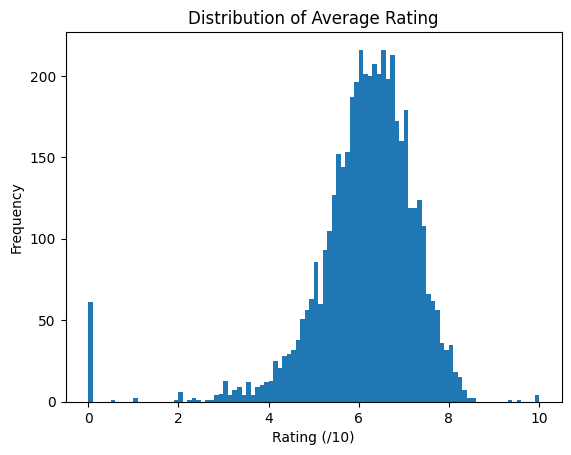

In [191]:
df['vote_average'].plot.hist(bins=100, title='Distribution of Average Rating').set_xlabel('Rating (/10)')

Most ratings lie between 5 and 7. There is also a significant number of 0 ratings and it seems that a rating of 10/10 is a very rare occurance. This tells us that a movie getting an average rating of 10 is extremely rare, while getting an average rating of 0 is more common.

Text(0.5, 0, 'Rating (/10)')

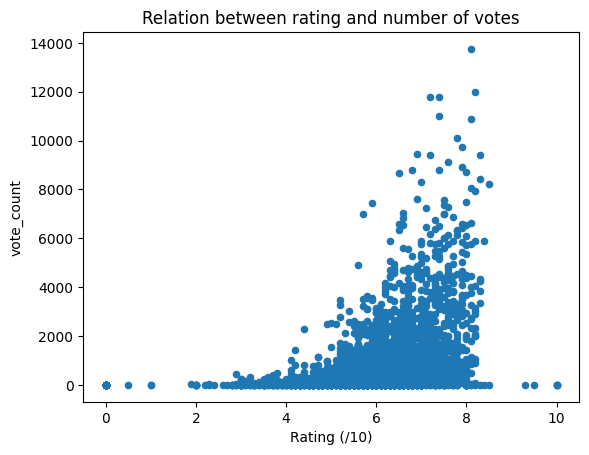

In [220]:
df.plot.scatter(x='vote_average', y='vote_count', title='Relation between rating and number of votes').set_xlabel('Rating (/10)')

There might be a positive relation between the number of votes and the average rating. To confirm, let's calculate the correlation between the two.

In [193]:
calculate_correlation('vote_count', 'vote_average')

The correlation between vote_count and vote_average = 0.3138688252394542


As predicted, there is a weak positive relation between the two factors, but there might be other factors that have a bigger impact on the average rating of a movie. Now I will explore which factors contribute to higher revenues

<AxesSubplot: title={'center': 'Relation between budget and revenue'}, xlabel='budget', ylabel='revenue'>

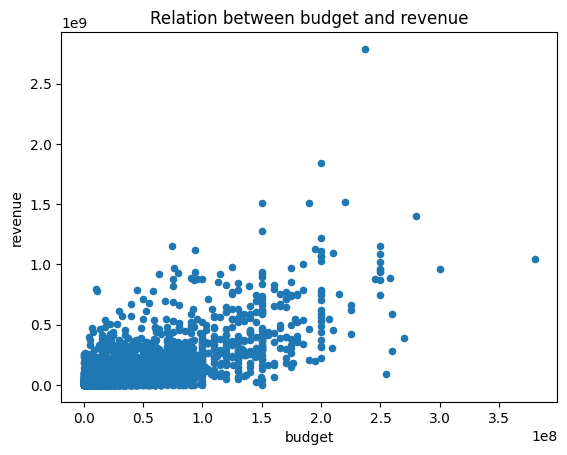

In [221]:
# check if budget is related to revenue
df.plot.scatter(x='budget', y='revenue', title='Relation between budget and revenue')

In [195]:
# next I will calculate the correlation between budget and vote_average
calculate_correlation('budget', 'revenue')

The correlation between budget and revenue = 0.7307642428927228


Turns out there is a strong relation between budget and revenue. This can indicate that movies with greater budget will probably bring a high revenue. Next I will explore the relation between the number of votes and revenue

Text(0.5, 0, 'Number of votes')

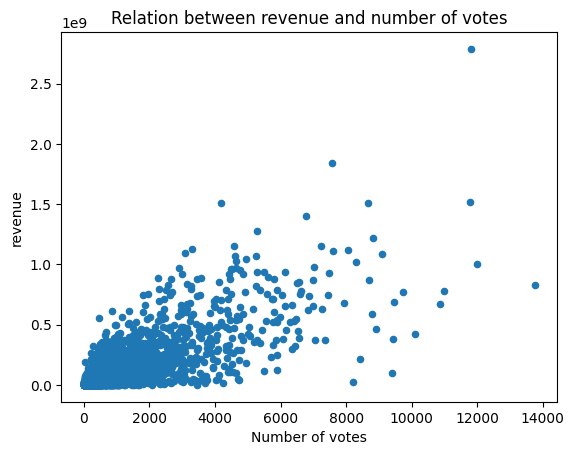

In [222]:
df.plot.scatter(x='vote_count', y='revenue', title='Relation between revenue and number of votes').set_xlabel('Number of votes')

This plot also shows a postive correlation from which we can conclude that a higher number of votes leads to higher revenues or vice versa.

In [197]:
# next I will calculate the correlation between budget and vote_average
calculate_correlation('vote_count', 'revenue')

The correlation between vote_count and revenue = 0.7814370614135775


As expected there is a strong positive relation between the two factors

I will check if there is a relation between revenues and ratings

Text(0.5, 0, 'Rating (/10)')

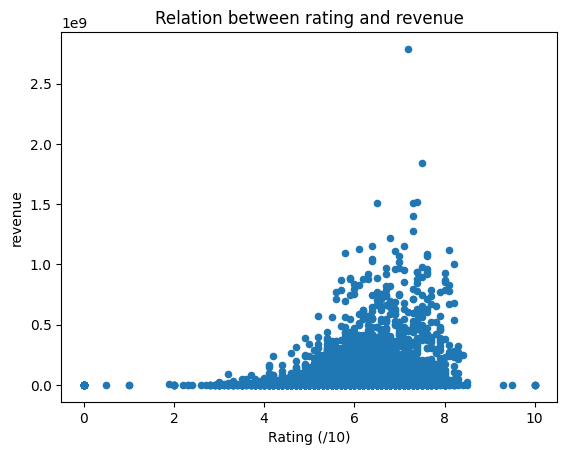

In [223]:
df.plot.scatter(x='vote_average', y='revenue', title='Relation between rating and revenue').set_xlabel('Rating (/10)')

In [199]:
# next I will calculate the correlation between revenue and vote_average
calculate_correlation('vote_average', 'revenue')

The correlation between vote_average and revenue = 0.1974368885832713


There is a weak positve relation between the rating and the revenue. This tells us that a higher rating does not necessary lead to higher revenues.

### 1D exploration of runtime

Now I will perform a 1D exploration of runtime to see if there is enough variation in it and then check if there is a relation between the length of a movie and its rating/revenue

Text(0.5, 0, 'Runtime (minutes)')

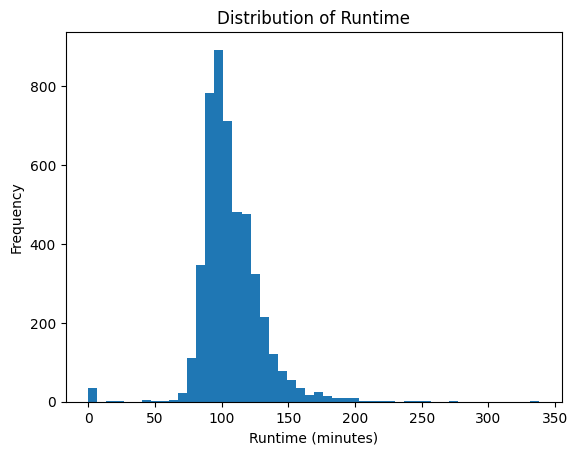

In [200]:
df['runtime'].plot.hist(bins=50, title='Distribution of Runtime').set_xlabel('Runtime (minutes)')

It seems that most movies have a runtime between 90 and 120 minutes. There are a few far outliers above 200 minutes or below 50 minutes. We may choose to omit these outlier to get cleaner data, but since there isn't enough variation in runtime, it doesn't make sense to check for a relation with other factors

### Which release months get the highest ratings/revenues?

Now I want to check if movies released in certain months of the year get higher ratings or revenues than movies released in other months. First I will need to extract months from release_date which I have previously converted to datetime.

In [201]:
# create a new column for the months
df['release_month'] = df['release_date'].dt.month

In [202]:
# create variable for storing average rating and revenue for each month
monthly_stats = df.groupby('release_month').agg({
    'vote_average': 'mean',
    'revenue': 'mean'
}).reset_index()

Text(0.5, 0, 'Month')

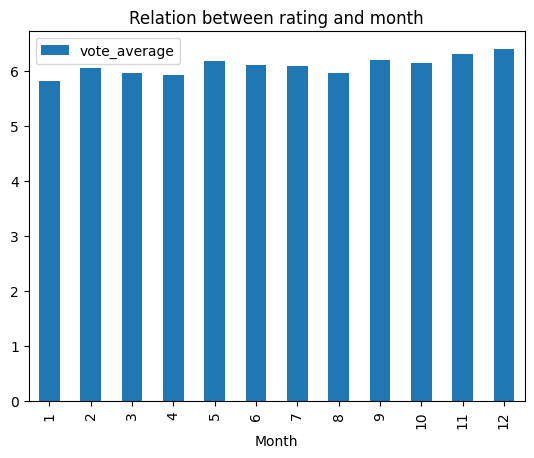

In [224]:
# plot rating with month
monthly_stats.plot.bar(x='release_month', y='vote_average', title='Relation between rating and month').set_xlabel('Month')

There seems to be no relationship between month of the year and the rating. This indicates that releasing a movie at a certain month does not contribute positively nor negatively to its rating. Now let us check if there is a relation between release month and revenue.

Text(0.5, 0, 'Month')

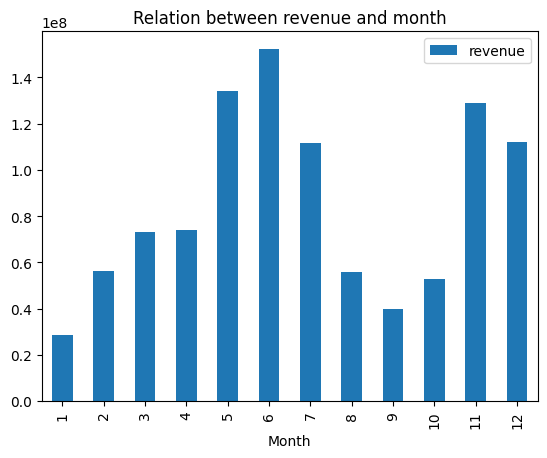

In [225]:
monthly_stats.plot.bar(x='release_month', y='revenue', title='Relation between revenue and month').set_xlabel('Month')

We can see some sort of a relation here. Movies released in months like January and September get the lowest revenue, while movies released in May, June, and November get the highest revenue.

<a id='conclusions'></a>
## Conclusions
After exploring the data trying to search for factors that contribute to higher average rating or revenue, I came to the following conclusions:

<ol>
    <li>Most movie ratings lie between 5 and 7, with a significant number of 0 ratings, suggesting that a perfect 10/10 rating is very rare, while 0 ratings are more common.</li>
    <li>There is a weak positive realtion between the number of votes and the average rating. More votes might slightly lead to higher average rating but the relation has a correlation of 0.3 which isn't very strong.</li>
    <li>There is a strong relation between the budget and the revenue of a movie. The statistics indicate that higher budgets lead to higher movie revenues</li>
    <li>There is also a strong relation between the number of votes and the revenue of a movie. The more votes a movie gets, the higher its revenue will be</li>
    <li>There is no strong relation between revenue and the average vote. This conflicts with the assumption that "good" movies bring more money. In our finding, a higher rating does not necessary lead to a higher revenue</li>
    <li>Movies released in January and September tend to have the lowest revenue, while those released in May, June, and November generate the highest revenue.</li>
</ol>

### Limitations
<ol>
    <li><b>Missing Data:</b> The dataset had missing values in several columns. Some rows with missing values were dropped, which might have affected the analysis.</li>
    <li><b>Correlation vs. Causation:</b> The analysis found correlations between various factors, but it is important to note that correlation does not imply causation. Further statistical tests and more detailed data would be needed to establish causative relationships.</li>
</ol>

### Additional Research
<ol>
    <li><b>Genre analysis:</b> explore the relation and the impact of different genres on revenue and rating of movies.</li>
    <li><b>Popularity analysis:</b> check how the popularity of a movie affects its rating. Does a popular movie generally get a high rating?</li>
</ol>